In [36]:
!pip install hvplot


In [37]:
# imports
import sklearn
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

In [38]:
#import dataframe as data
data = pd.read_csv('Train.csv')
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


Text(0.5, 0, 'Price')

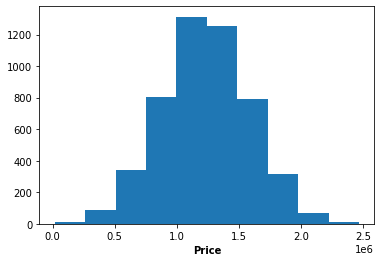

In [39]:
plt.hist(data["Price"])
plt.xlabel('Price', fontweight ="bold")

Text(0.5, 0, 'Avg. Area House Age')

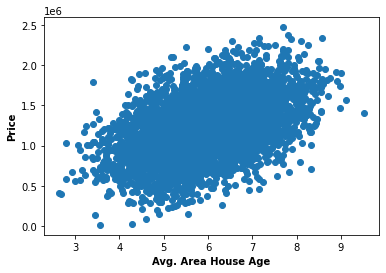

In [40]:
plt.scatter(x=data['Avg. Area House Age'], y=data['Price'])
plt.ylabel('Price', fontweight ="bold")
plt.xlabel('Avg. Area House Age', fontweight ="bold")

Text(0, 0.5, 'Price')

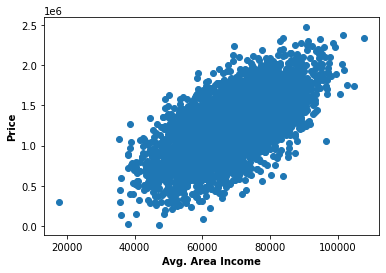

In [41]:
plt.scatter(x=data['Avg. Area Income'], y=data['Price'])
plt.xlabel('Avg. Area Income', fontweight ="bold")
plt.ylabel('Price', fontweight ="bold")

Text(0, 0.5, 'Price')

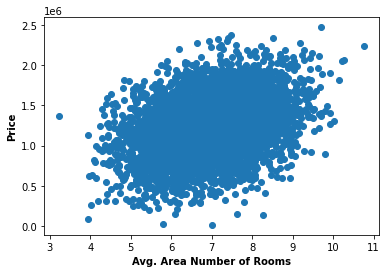

In [42]:
plt.scatter(x=data['Avg. Area Number of Rooms'], y=data['Price'])
plt.xlabel('Avg. Area Number of Rooms', fontweight ="bold")
plt.ylabel('Price', fontweight ="bold")

Text(0, 0.5, 'Amount')

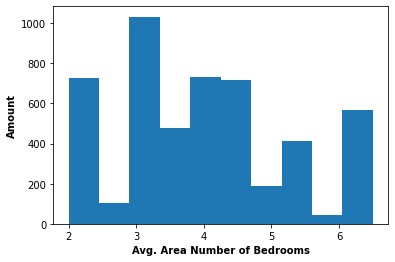

In [43]:
plt.hist(x=data['Avg. Area Number of Bedrooms'])
plt.xlabel('Avg. Area Number of Bedrooms', fontweight ="bold")
plt.ylabel('Amount', fontweight ="bold")

Text(0, 0.5, 'Price')

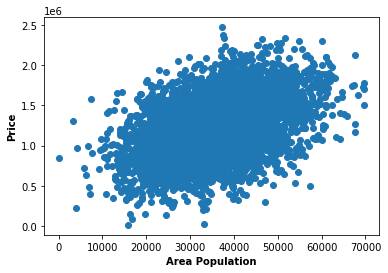

In [44]:
plt.scatter(x=data['Area Population'], y=data['Price'])
plt.xlabel('Area Population', fontweight ="bold")
plt.ylabel('Price', fontweight ="bold")

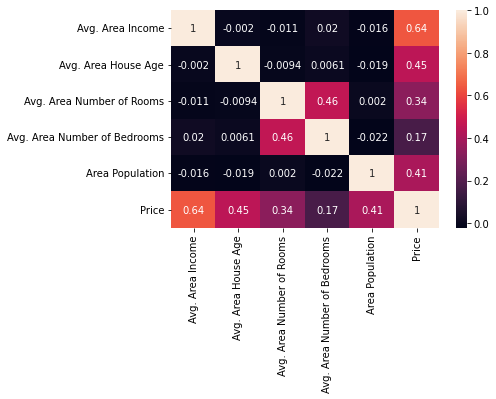

In [45]:
sns.heatmap(data.corr(), annot=True)


In [46]:
X = data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [47]:
def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)


Model number 1 - Linear Regression
                                Coefficient
Avg. Area Income              232679.724643
Avg. Area House Age           163841.046593
Avg. Area Number of Rooms     121110.555478
Avg. Area Number of Bedrooms    2892.815119
Area Population               151252.342377
Test set evaluation:
_____________________________________
MAE: 81135.56609336878
MSE: 10068422551.40088
RMSE: 100341.52954485436
R2 Square 0.9146818498754016
__________________________________
Train set evaluation:
_____________________________________
MAE: 81480.49973174892
MSE: 10287043161.197224
RMSE: 101425.06180031257
R2 Square 0.9192986579075526
__________________________________
               Model           MAE           MSE           RMSE  R2 Square  \
0  Linear Regression  81135.566093  1.006842e+10  100341.529545   0.914682   

   Cross Validation  
0          0.917379  


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


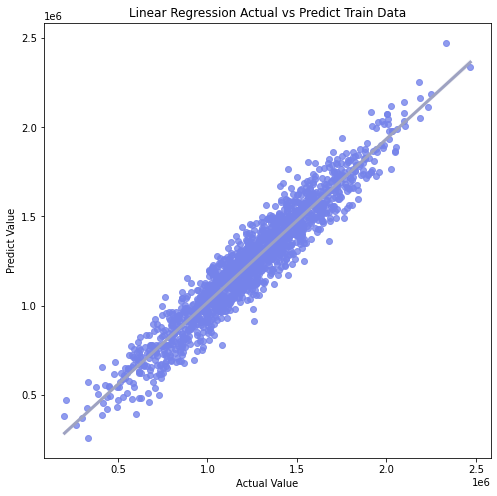

In [48]:
# Model no 1.
#Linear Regression
def create_Linear_Regrresion_model():
    lin_reg = LinearRegression()
    lin_reg.fit(X_train,y_train)
    print('\nModel number 1 - Linear Regression')
    coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
    print(coeff_df)
    pred = lin_reg.predict(X_test)
    pd.DataFrame({'True Values': y_test, 'Predicted Values': pred}).hvplot.scatter(x='True Values', y='Predicted Values')
    pd.DataFrame({'Error Values': (y_test - pred)}).hvplot.kde()
    test_pred = lin_reg.predict(X_test)
    train_pred = lin_reg.predict(X_train)
    print('Test set evaluation:\n_____________________________________')
    print_evaluate(y_test, test_pred)
    print('Train set evaluation:\n_____________________________________')
    print_evaluate(y_train, train_pred)
    results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
    print(results_df)
    plt.figure(figsize=(8, 8))
    sns.regplot(y_test, test_pred, scatter_kws=dict(color="#7583EA"), line_kws=dict(color="#9EA2C1", linewidth=3))
    plt.title("Linear Regression Actual vs Predict Train Data")
    plt.xlabel("Actual Value")
    plt.ylabel("Predict Value")
    
create_Linear_Regrresion_model()


Model number 2 - KNN with 3 neighbors
                              Coefficient
Avg. Area Income                 0.927144
Avg. Area House Age              0.927144
Avg. Area Number of Rooms        0.927144
Avg. Area Number of Bedrooms     0.927144
Area Population                  0.927144
Test set evaluation:
_____________________________________
MAE: 110416.92048474538
MSE: 18721119493.630993
RMSE: 136825.14203767886
R2 Square 0.8413603247873304
__________________________________
Train set evaluation:
_____________________________________
MAE: 77330.57340404775
MSE: 9286934654.968918
RMSE: 96368.74314303843
R2 Square 0.9271444594100811
__________________________________


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning



Model number 2 - KNN with 8 neighbors
                              Coefficient
Avg. Area Income                 0.901984
Avg. Area House Age              0.901984
Avg. Area Number of Rooms        0.901984
Avg. Area Number of Bedrooms     0.901984
Area Population                  0.901984
Test set evaluation:
_____________________________________
MAE: 99802.51338430308
MSE: 15644238959.878263
RMSE: 125076.93216528083
R2 Square 0.8674333023519881
__________________________________
Train set evaluation:
_____________________________________
MAE: 89134.64666406093
MSE: 12494121124.127361
RMSE: 111777.1046508513
R2 Square 0.9019842410318681
__________________________________


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning



Model number 2 - KNN with 10 neighbors
                              Coefficient
Avg. Area Income                 0.898455
Avg. Area House Age              0.898455
Avg. Area Number of Rooms        0.898455
Avg. Area Number of Bedrooms     0.898455
Area Population                  0.898455
Test set evaluation:
_____________________________________
MAE: 98991.63253116103
MSE: 15392853397.117458
RMSE: 124067.9386349167
R2 Square 0.8695635021000906
__________________________________
Train set evaluation:
_____________________________________
MAE: 90617.98276965883
MSE: 12944035896.934874
RMSE: 113771.85898514128
R2 Square 0.8984546820105022
__________________________________


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


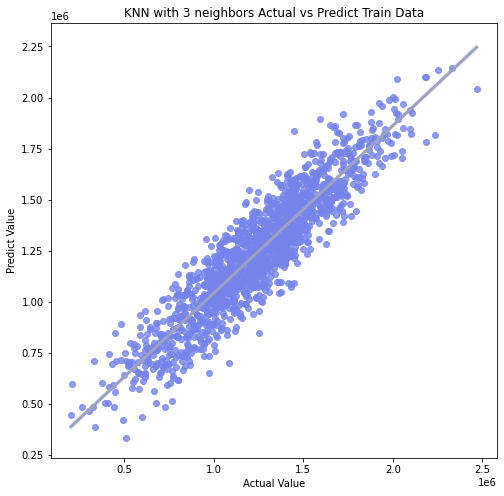

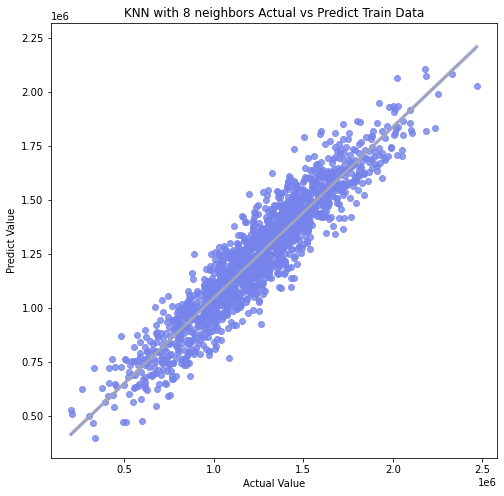

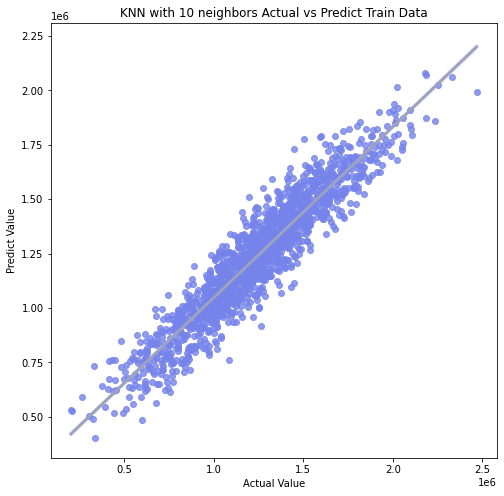

In [49]:
# Model no 2.
# KNN
def create_KNN_model():   
    n_neighbors = [3, 8, 10]
    for i in n_neighbors:
        print('\nModel number 2 - KNN with {} neighbors'.format(i))
        knn = KNeighborsRegressor(i)
        knn.fit(X_train,y_train)    
        coeff_df = pd.DataFrame(knn.score(X=X_train, y=y_train), X.columns, columns=['Coefficient'])
        print(coeff_df)
        test_pred = knn.predict(X_test)
        train_pred = knn.predict(X_train)
        print('Test set evaluation:\n_____________________________________')
        print_evaluate(y_test, test_pred)
        print('Train set evaluation:\n_____________________________________')
        print_evaluate(y_train, train_pred)
        plt.figure(figsize=(8, 8))
        sns.regplot(y_test, test_pred, scatter_kws=dict(color="#7583EA"), line_kws=dict(color="#9EA2C1", linewidth=3))
        plt.title("KNN with {} neighbors Actual vs Predict Train Data".format(i))
        plt.xlabel("Actual Value")
        plt.ylabel("Predict Value")

create_KNN_model()

In [50]:
#find HyperParameters For Knn
def find_hyperparameters_knn():
    #List Hyperparameters that we want to tune.
    leaf_size = list(range(1, 50))
    n_neighbors = list(range(1, 20))
    p = [1, 2]
    #Convert to dictionary
    hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
    #Create new KNN object
    knn_2 = knn = KNeighborsRegressor()
    #Use GridSearch
    knn = GridSearchCV(knn_2, hyperparameters, cv=10)
    #Fit the model
    best_model = knn.fit(X_train, y_train)
    #Print The value of best Hyperparameters
    print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
    return best_model

In [51]:
#Knn With Hyperparameters
def knn_with_hyperparameters(knn):
    coeff_df = pd.DataFrame(knn.score(X=X_train,y=y_train), X.columns, columns=['Coefficient'])
    print(coeff_df)
    test_pred = knn.predict(X_test)
    train_pred = knn.predict(X_train)
    print('\nModel number 2 - KNN with Hyperparameters')
    print('Test set evaluation:\n_____________________________________')
    print_evaluate(y_test, test_pred)
    print('Train set evaluation:\n_____________________________________')
    print_evaluate(y_train, train_pred)
    plt.figure(figsize=(8, 8))
    sns.regplot(y_test, test_pred, scatter_kws=dict(color="#7583EA"), line_kws=dict(color="#9EA2C1", linewidth=3))
    plt.title("KNN with Hyperparameters Actual vs Predict Train Data")
    plt.xlabel("Actual Value")
    plt.ylabel("Predict Value")


Best n_neighbors: 14
                              Coefficient
Avg. Area Income                  0.89383
Avg. Area House Age               0.89383
Avg. Area Number of Rooms         0.89383
Avg. Area Number of Bedrooms      0.89383
Area Population                   0.89383

Model number 2 - KNN with Hyperparameters
Test set evaluation:
_____________________________________
MAE: 98560.4669536799
MSE: 15429624130.213854
RMSE: 124216.03813603883
R2 Square 0.8692519129797002
__________________________________
Train set evaluation:
_____________________________________
MAE: 92408.04533992754
MSE: 13533576505.608768
RMSE: 116333.90093007614
R2 Square 0.8938297652494409
__________________________________


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


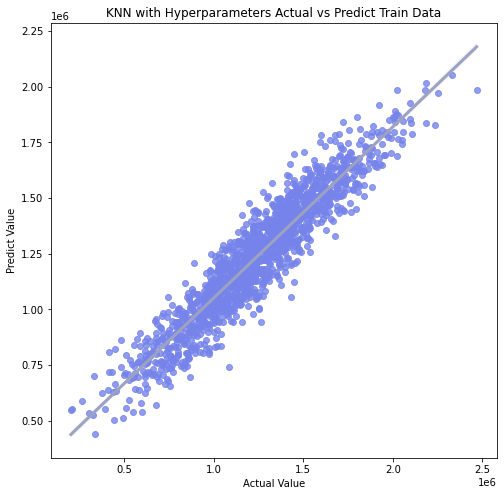

In [52]:
knn_with_hyperparameters(find_hyperparameters_knn())